# Notebook de ejemplo – Toolbox ML

Este notebook muestra un ejemplo de uso del módulo `toolbox_ML.py`
para análisis exploratorio y selección de variables, aplicado al dataset "dataset_viajes_jun23".

### Índice
1. [Carga de librerías y módulo](#sec-librerias)
2. [Carga de datos](#sec-datos)
3. [Análisis estructural](#sec-estructural)
4. [Tipificación de variables](#sec-tipificacion)
5. [Análisis de variables numéricas: regresión](#sec-numericas)
6. [Análisis de variables categóricas: regresión](#sec-categoricas)

<a id="sec-librerias"></a>
## 1. Carga de librerías y módulo

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import toolbox_ML as tb


<a id="sec-datos"></a>
## 2. Carga de datos

Realizamos la carga del dataset y hacemos una inspección inicial

In [21]:
df = pd.read_csv("./data/dataset_viajes_jun23.csv")
df.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [22]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    str    
 1   origen      600 non-null    str    
 2   destino     600 non-null    str    
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    str    
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    str    
 10  mes         600 non-null    str    
dtypes: bool(1), float64(2), int64(2), str(6)
memory usage: 47.6 KB


<a id="sec-estructural"></a>
## 3. Análisis estructural

La función `describe_df` realiza un resumen estructural del DataFrame, devolviendo para cada columna:
- Tipo de dato 
- Porcentaje de valores nulos
- Número de valores únicos
- Cardinalidad relativa

In [23]:
tb.describe_df(df)

COL_N,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
DATA_TYPE,str,str,str,int64,str,bool,float64,int64,float64,str,str
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,11,11,45,4,2,501,113,600,347,1
CARDIN (%),0.83,1.83,1.83,7.5,0.67,0.33,83.5,18.83,100.0,57.83,0.17


<a id="sec-tipificacion"></a>
## 4. Tipificación de variables
La función `tipifica_variables` realiza una clasificación inicial de las variables según su cardinalidad, para orientar el análisis exploratorio (no para sustituir el criterio del analista).
- Binaria: si tiene dos valores distintos
- Categórica: si tiene pocos valores distintos, menos que el `umbral_categoria`
- Numérica discreta: si tiene muchos valores distintos, pero el porcentaje de cardinalidad es bajo
- Numérica continua: si tiene muchos valores distintos y el porcentaje de cardinalidad supera `umbral_continua`

In [24]:
tb.tipifica_variables(df, umbral_categoria=12, umbral_continua=7.5)

# id_vuelo considerada categórica

,nombre_variable,tipo_sugerido
0,aircompany,Categórica
1,origen,Categórica
2,destino,Categórica
3,distancia,Numérica Continua
4,avion,Categórica
5,con_escala,Binaria
6,consumo_kg,Numérica Continua
7,duracion,Numérica Continua
8,ingresos,Numérica Continua
9,id_vuelo,Numérica Continua


<a id="sec-numericas"></a>
## 5. Análisis de variables numéricas: regresión
### 5.1. Función get_features_num_regression
La función `get_features_num_regression` identifica variables numéricas potencialmente relevantes para un problema de regresión, evaluando su relación estadísticamente significativa con la variable target mediante correlación lineal. Aporta una lista de variables numéricas relevantes.

In [25]:
features_num = tb.get_features_num_regression(df, target_col="ingresos", umbral_corr=0.3, pvalue=0.05)
features_num

['distancia', 'consumo_kg', 'duracion']

### 5.2. Función plot_features_num_regression
La función `plot_features_num_regression` genera gráficos de dispersión entre el target y las variables numéricas que superan el test de significancia. Lo que permite visualizar relaciones lineales o no lineales, y detectar outliers.  

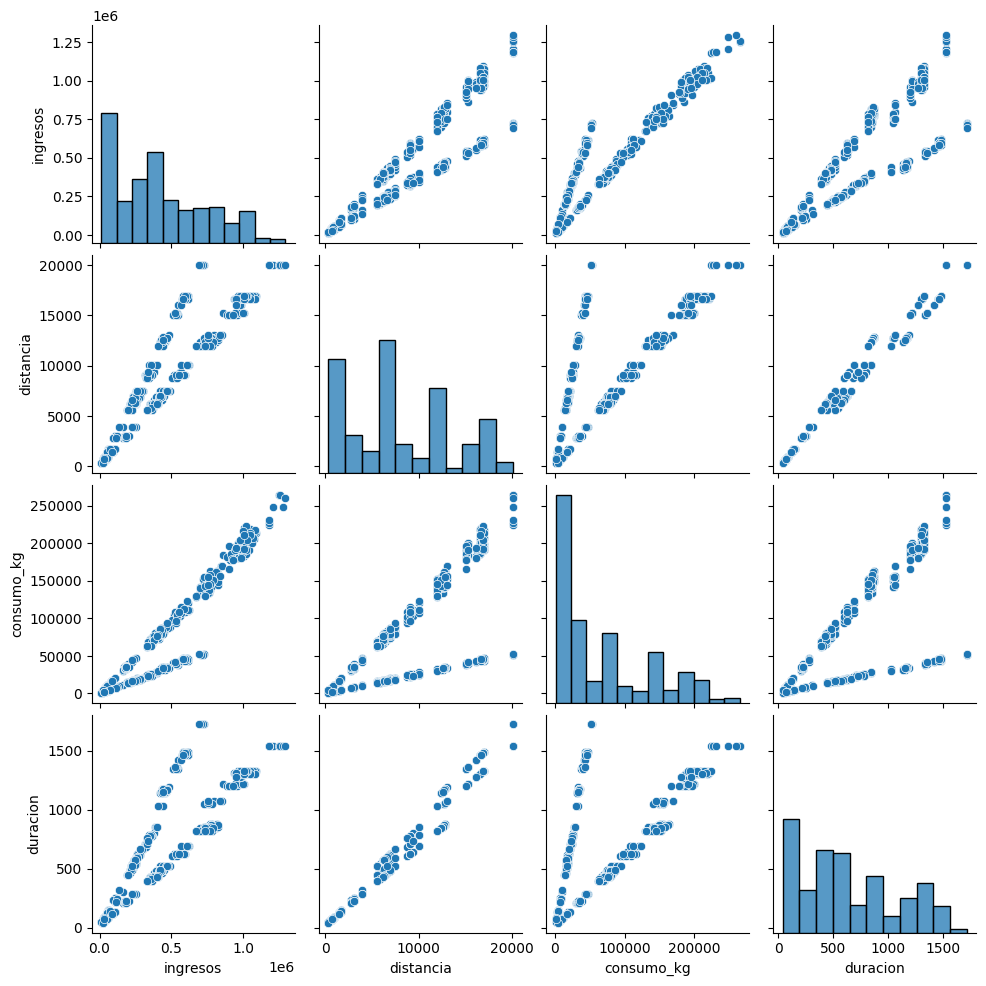

['distancia', 'consumo_kg', 'duracion']

In [26]:
tb.plot_features_num_regression(df, target_col="ingresos",columns= features_num, umbral_corr=0.3, pvalue= 0.05)

<a id="sec-categoricas"></a>
## 6. Análisis de variables categóricas: regresión

### 6.1.  Función get_features_cat_regression
La función `get_features_cat_regression` identifica variables categóricas que tienen relación significativa con la variable tárget numérica. Dependiendo del número de categorías, elegirá un test u otro, aportando una lista de variables categóricas relevantes: 
- 2 categorías → t-test
- +2 categorías → ANOVA

In [27]:
cols_sel_cat= tb.get_features_cat_regression(df, "ingresos", pvalue=0.05)
cols_sel_cat

['aircompany', 'origen', 'destino', 'avion', 'con_escala', 'id_vuelo']

### 6.2. Función plot_features_cat_regression
La función `plot_features_cat_regression` genera histogramas del target numérico agrupados por cada variable categórica significativa. Permite comparar distribuciones e identificar diferencias claras entre grupos.

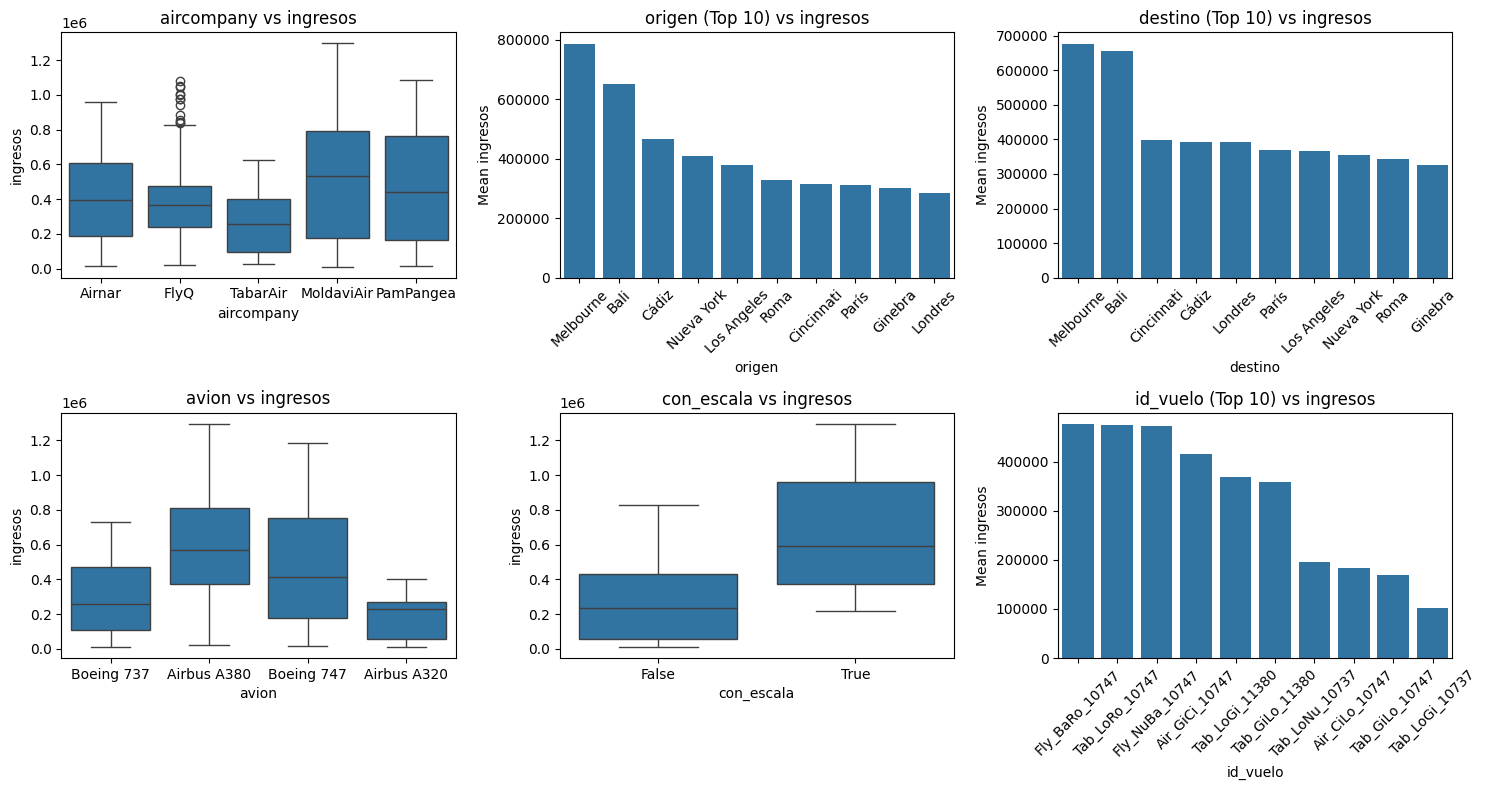

In [29]:
from toolbox_ML import plot_features_cat_regression
plot_features_cat_regression(df, "ingresos", pvalue= 0.05, with_individual_plot=True);